In [ ]:
#Assignment 11 Text Mining Amazon Devices review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import spacy
import re
nlp = spacy.load('en_core_web_sm')

In [3]:
from PIL import Image
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thila\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

### 1. importing data

In [5]:
data = pd.read_csv("Amazon reviews.csv")
data.head()

brand manufacturer               name  \
0  Amazon       Amazon  Kindle Paperwhite   
1  Amazon       Amazon  Kindle Paperwhite   
2  Amazon       Amazon  Kindle Paperwhite   
3  Amazon       Amazon  Kindle Paperwhite   
4  Amazon       Amazon  Kindle Paperwhite   

                                        reviews.text  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't like coroporat...   

                                reviews.title    reviews.username  rating  
0              Paperwhite voyage, no regrets!          Cristina M       1  
1           One Simply Could Not Ask For More               Ricky       3  
2  Great for those that just want an e-reader       Tedd Gardiner       1  
3                    Love / Hate relationship              Dougal       2  
4                                   I LOVE IT  Miljan David Tanic       1

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   brand             1597 non-null   object
 1   manufacturer      965 non-null    object
 2   name              1597 non-null   object
 3   reviews.text      1597 non-null   object
 4   reviews.title     1580 non-null   object
 5   reviews.username  1580 non-null   object
 6   rating            1597 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 87.5+ KB


In [7]:
data['rating'].value_counts()

3    350
1    341
4    327
2    291
5    288
Name: rating, dtype: int64

In [8]:
def rating_fn(r):
    if r['rating'] == 3.0:
        val = 'neutral'
    elif r['rating'] == 1.0 or r['rating'] == 2.0:
        val = 'negative'
    elif r['rating'] == 4.0 or r['rating'] == 5.0:
        val = 'positive'
    else:
        val = -1
    return val

data['rating_value'] = data.apply(rating_fn, axis=1)
data.head()

brand manufacturer               name  \
0  Amazon       Amazon  Kindle Paperwhite   
1  Amazon       Amazon  Kindle Paperwhite   
2  Amazon       Amazon  Kindle Paperwhite   
3  Amazon       Amazon  Kindle Paperwhite   
4  Amazon       Amazon  Kindle Paperwhite   

                                        reviews.text  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't like coroporat...   

                                reviews.title    reviews.username  rating  \
0              Paperwhite voyage, no regrets!          Cristina M       1   
1           One Simply Could Not Ask For More               Ricky       3   
2  Great for those that just want an e-reader       Tedd Gardiner       1   
3                    Love / Hate relationship              Dougal       2   
4                                   I LOVE IT  Miljan David Tanic       1   

  rating_value  
0     negative  
1      neutral  
2     negative  
3     negative  
4     negative

### 3. pre-processing text

In [9]:
# Creating a function to clean the tweets

def cleantwt (twt):
  emoji = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002500-\U00002BEF"  # chinese char
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         u"\U0001f926-\U0001f937"
         u"\U00010000-\U0010ffff"
         u"\u2640-\u2642" 
         u"\u2600-\u2B55"
         u"\u200d"
         u"\u23cf"
         u"\u23e9"
         u"\u231a"
         u"\ufe0f"                  # dingbats
         u"\u3030"
                      "]+", re.UNICODE)

  twt = re.sub('RT', '', twt)                                    # remove 'RT' from tweets
  twt = re.sub('#[A-Za-z0-9]+', '', twt)                         # remove the '#' from the tweets
  twt = re.sub('\\n', '', twt)                                   # remove the '\n' character
  twt = re.sub('https?:\/\/\S+', '', twt)                        # remove the hyperlinks
  twt = re.sub('@[\S]*', '', twt)                                # remove @mentions
  twt = re.sub('^[\s]+|[\s]+$', '', twt)                         # remove leading and trailing whitespaces
  twt = re.sub(emoji, '', twt)                                   # remove emojis
  twt = re.sub("[^A-Za-z]+"," ",twt).lower()                     # converting to lower
  twt = re.sub("[0-9]+"," ",twt)

  return twt

In [11]:
# Create a new column with the cleaned tweets

data['Cleaned_reviews'] = data['reviews.text'].apply(cleantwt)
data.head()

brand manufacturer               name  \
0  Amazon       Amazon  Kindle Paperwhite   
1  Amazon       Amazon  Kindle Paperwhite   
2  Amazon       Amazon  Kindle Paperwhite   
3  Amazon       Amazon  Kindle Paperwhite   
4  Amazon       Amazon  Kindle Paperwhite   

                                        reviews.text  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't like coroporat...   

                                reviews.title    reviews.username  rating  \
0              Paperwhite voyage, no regrets!          Cristina M       1   
1           One Simply Could Not Ask For More               Ricky       3   
2  Great for those that just want an e-reader       Tedd Gardiner       1   
3                    Love / Hate relationship              Dougal       2   
4                                   I LOVE IT  Miljan David Tanic       1   

  rating_value                                    Cleaned_reviews  
0     negative  i initially had trouble deciding between the p...  
1      neutral  allow me to preface this with a little history...  
2     negative  i am enjoying it so far great for reading had ...  
3     negative  i bought one of the first paperwhites and have...  
4     negative  i have to say upfront i don t like coroporate ...

In [12]:
data.drop(data[data['Cleaned_reviews'] == ''].index, inplace = True)

In [13]:
data.reset_index(drop=True, inplace=True)                                

In [14]:
vectorizer = CountVectorizer(ngram_range=(1,1))
x = vectorizer.fit_transform(data['Cleaned_reviews'])
print(x.toarray()) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
def twt (doc):
    doc = nlp(doc)
    return doc

In [16]:
data['reviews_doc'] = data['Cleaned_reviews'].apply(twt)
data.head()

brand manufacturer               name  \
0  Amazon       Amazon  Kindle Paperwhite   
1  Amazon       Amazon  Kindle Paperwhite   
2  Amazon       Amazon  Kindle Paperwhite   
3  Amazon       Amazon  Kindle Paperwhite   
4  Amazon       Amazon  Kindle Paperwhite   

                                        reviews.text  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't like coroporat...   

                                reviews.title    reviews.username  rating  \
0              Paperwhite voyage, no regrets!          Cristina M       1   
1           One Simply Could Not Ask For More               Ricky       3   
2  Great for those that just want an e-reader       Tedd Gardiner       1   
3                    Love / Hate relationship              Dougal       2   
4                                   I LOVE IT  Miljan David Tanic       1   

  rating_value                                    Cleaned_reviews  \
0     negative  i initially had trouble deciding between the p...   
1      neutral  allow me to preface this with a little history...   
2     negative  i am enjoying it so far great for reading had ...   
3     negative  i bought one of the first paperwhites and have...   
4     negative  i have to say upfront i don t like coroporate ...   

                                         reviews_doc  
0  (i, initially, had, trouble, deciding, between...  
1  (allow, me, to, preface, this, with, a, little...  
2  (i, am, enjoying, it, so, far, great, for, rea...  
3  (i, bought, one, of, the, first, paperwhites, ...  
4  (i, have, to, say, upfront, i, don, t, like, c...

# Tokenization

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   brand             1597 non-null   object
 1   manufacturer      965 non-null    object
 2   name              1597 non-null   object
 3   reviews.text      1597 non-null   object
 4   reviews.title     1580 non-null   object
 5   reviews.username  1580 non-null   object
 6   rating            1597 non-null   int64 
 7   rating_value      1597 non-null   object
 8   Cleaned_reviews   1597 non-null   object
 9   reviews_doc       1597 non-null   object
dtypes: int64(1), object(9)
memory usage: 124.9+ KB


In [18]:
for i in range (0,1597) :
    for token in data['reviews_doc'][i] :
        print (token.text,end = '|')
    print ("\n")

i|initially|had|trouble|deciding|between|the|paperwhite|and|the|voyage|because|reviews|more|or|less|said|the|same|thing|the|paperwhite|is|great|but|if|you|have|spending|money|go|for|the|voyage|fortunately|i|had|friends|who|owned|each|so|i|ended|up|buying|the|paperwhite|on|this|basis|both|models|now|have|ppi|so|the|dollar|jump|turns|out|pricey|the|voyage|s|page|press|isn|t|always|sensitive|and|if|you|are|fine|with|a|specific|setting|you|don|t|need|auto|light|adjustment|it|s|been|a|week|and|i|am|loving|my|paperwhite|no|regrets|the|touch|screen|is|receptive|and|easy|to|use|and|i|keep|the|light|at|a|specific|setting|regardless|of|the|time|of|day|in|any|case|it|s|not|hard|to|change|the|setting|either|as|you|ll|only|be|changing|the|light|level|at|a|certain|time|of|day|not|every|now|and|then|while|reading|also|glad|that|i|went|for|the|international|shipping|option|with|amazon|extra|expense|but|delivery|was|on|time|with|tracking|and|i|did|nt|need|to|worry|about|customs|which|i|may|have|if|i|us

i|am|thrilled|with|the|new|fire|hd|even|before|it|gets|alexa|at|that|time|i|will|likely|be|ecstatic|i|am|far|from|a|tablet|novice|i|had|the|original|fire|the|fire|the|samsung|galaxy|tab|and|the|galaxy|tab|s|my|phones|have|always|been|samsung|flagship|phones|currently|the|s|edge|i|say|this|to|show|that|i|have|experience|with|kindle|fires|and|generally|tend|to|have|high|standards|for|my|most|used|devices|i|know|what|is|a|good|tablet|and|what|is|a|so|so|tablet|admittedly|my|previous|fires|have|been|so|so|but|i|wanted|something|inexpensive|yet|adequate|to|take|places|with|me|instead|of|my|galaxy|tab|s|my|hd|is|the|gb|option|with|offers|most|users|will|likely|be|fine|with|gb|and|perhaps|an|added|gb|or|gb|sd|card|however|i|know|how|i|use|my|devices|so|went|with|the|gb|option|as|well|as|a|gb|micro|sd|card|in|the|hours|i|have|had|my|new|fire|it|has|become|my|device|of|choice|even|over|my|samsung|more|convenient|size|i|use|the|large|samsung|tablet|as|a|computer|replacement|whereas|the|new|fire|

i|bought|these|for|a|couple|of|reasons|first|i|wanted|an|earbud|that|was|not|designed|as|noise|cancelling|i|hate|having|to|shove|headphones|into|my|brain|to|use|them|apparently|a|lot|of|people|are|under|the|assumption|that|these|are|supposed|to|be|noise|cancelling|or|something|which|they|are|not|they|are|simple|earbuds|i|hate|not|being|able|to|hear|what|is|going|on|around|me|and|don|t|feel|safe|in|public|using|headphones|that|block|everything|else|out|these|are|designed|just|like|the|old|style|earbuds|that|you|stick|in|your|ears|but|they|are|more|comfortable|maybe|i|have|small|ears|or|something|but|they|could|never|fall|out|or|dislodge|from|my|ears|they|don|t|cancel|the|outside|noise|but|they|sit|in|my|ears|exactly|as|they|are|supposed|to|so|the|sound|travels|right|into|my|ears|second|i|really|like|the|magnets|and|tangle|free|aspects|of|the|headphones|i|use|headphones|while|i|work|and|the|magnets|allow|me|to|hang|the|headphones|easily|when|i|am|finished|with|them|the|flat|cord|and|magn

#### f) part of speech

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   brand             1597 non-null   object
 1   manufacturer      965 non-null    object
 2   name              1597 non-null   object
 3   reviews.text      1597 non-null   object
 4   reviews.title     1580 non-null   object
 5   reviews.username  1580 non-null   object
 6   rating            1597 non-null   int64 
 7   rating_value      1597 non-null   object
 8   Cleaned_reviews   1597 non-null   object
 9   reviews_doc       1597 non-null   object
dtypes: int64(1), object(9)
memory usage: 124.9+ KB


In [20]:
for i in range (0,1597) :
    for token in data['reviews_doc'][i]:
        print (token.text,'----->',token.pos_)
    print("\n")

i -----> PRON
initially -----> ADV
had -----> VERB
trouble -----> NOUN
deciding -----> VERB
between -----> ADP
the -----> DET
paperwhite -----> NOUN
and -----> CCONJ
the -----> DET
voyage -----> NOUN
because -----> SCONJ
reviews -----> VERB
more -----> ADV
or -----> CCONJ
less -----> ADJ
said -----> VERB
the -----> DET
same -----> ADJ
thing -----> NOUN
the -----> DET
paperwhite -----> NOUN
is -----> AUX
great -----> ADJ
but -----> CCONJ
if -----> SCONJ
you -----> PRON
have -----> VERB
spending -----> VERB
money -----> NOUN
go -----> VERB
for -----> ADP
the -----> DET
voyage -----> NOUN
fortunately -----> ADV
i -----> PRON
had -----> VERB
friends -----> NOUN
who -----> PRON
owned -----> VERB
each -----> PRON
so -----> SCONJ
i -----> PRON
ended -----> VERB
up -----> ADP
buying -----> VERB
the -----> DET
paperwhite -----> NOUN
on -----> ADP
this -----> DET
basis -----> NOUN
both -----> DET
models -----> NOUN
now -----> ADV
have -----> VERB
ppi -----> NOUN
so -----> ADV
the -----> DET
doll

week -----> NOUN
show -----> NOUN
redeemed -----> VERB
amazon -----> NOUN
if -----> SCONJ
yours -----> NOUN
isn -----> ADJ
t -----> NOUN
working -----> VERB
you -----> PRON
either -----> CCONJ
got -----> VERB
a -----> DET
dud -----> NOUN
or -----> CCONJ
you -----> PRON
re -----> AUX
not -----> PART
doing -----> VERB
something -----> PRON
right -----> ADV


first -----> ADJ
day -----> NOUN
with -----> ADP
the -----> DET
echo -----> PROPN
show -----> NOUN
i -----> PRON
m -----> VERB
pretty -----> ADV
pleased -----> ADJ
with -----> ADP
it -----> PRON
some -----> DET
observations -----> NOUN
that -----> PRON
i -----> PRON
think -----> VERB
have -----> AUX
not -----> PART
been -----> AUX
hit -----> VERB
in -----> ADP
most -----> ADJ
reviews -----> NOUN
sound -----> ADJ
quality -----> NOUN
seems -----> VERB
similar -----> ADJ
to -----> ADP
that -----> PRON
of -----> ADP
the -----> DET
echo -----> NOUN
cylinder -----> NOUN
good -----> ADJ
for -----> ADP
a -----> DET
desktop -----> NOUN
listen

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#### g) named entity recognition

In [21]:
def show_ents (doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
    else:
        print('no named entity found.')

In [22]:
for i in range (0,1597) :
    for token in data['reviews_doc'][i].ents:
        print (token.text,'----->',token.label_)

a week -----> DATE
third -----> ORDINAL
harry potter series -----> WORK_OF_ART
today -----> DATE
a full week -----> DATE
the past years -----> DATE
one -----> CARDINAL
a full week -----> DATE
a ton -----> QUANTITY
half -----> CARDINAL
one -----> CARDINAL
first -----> ORDINAL
many years -----> DATE
amazons -----> CARDINAL
daily -----> DATE
some days -----> DATE
two -----> CARDINAL
thousands -----> CARDINAL
second -----> ORDINAL
first -----> ORDINAL
several years -----> DATE
serbia -----> GPE
serbia -----> GPE
serbia -----> GPE
these two days -----> DATE
one -----> CARDINAL
second -----> ORDINAL
years -----> DATE
english -----> NORP
chinese -----> NORP
chinese -----> NORP
chinese -----> NORP
harry potter series -----> WORK_OF_ART
today -----> DATE
a full week -----> DATE
the past years -----> DATE
one -----> CARDINAL
a full week -----> DATE
a ton -----> QUANTITY
half -----> CARDINAL
a week -----> DATE
third -----> ORDINAL
months -----> DATE
as long as minutes -----> TIME
sweden -----> GP

#### h) lemmatization

In [23]:
for i in range (0,1597) :
    for token in data['reviews_doc'][i]:
        print (f'{token.text:{12}} {token.pos_:{6}} {token.lemma_}')
    print("\n")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




but          CCONJ  but
compared     VERB   compare
to           ADP    to
the          DET    the
regular      ADJ    regular
earpods      NOUN   earpod
i            PRON   I
think        VERB   think
amazon       PROPN  amazon
s            PROPN  s
headphones   NOUN   headphone
actually     ADV    actually
sound        VERB   sound
a            DET    a
bit          NOUN   bit
better       ADJ    well
they         PRON   they
provide      VERB   provide
a            DET    a
nice         ADJ    nice
full         ADJ    full
sound        NOUN   sound
and          CCONJ  and
represent    VERB   represent
highs        NOUN   high
lows         NOUN   low
and          CCONJ  and
mids         VERB   mid
equally      ADV    equally
well         ADV    well
mainly       ADV    mainly
listening    VERB   listen
to           ADP    to
metal        NOUN   metal
fit          NOUN   fit
and          CCONJ  and
feel         VERB   feel
some         DET    some
people       NOUN   people
have     

#### i) need of lemmatization for stop words (replacing tokens with lemmatized words)

In [24]:
print(nlp.vocab['go'].is_stop)
print(nlp.vocab['went'].is_stop)

True
False


In [ ]:
#we observe that go is stop word while its second and third forms are not.
#that is why we do  lemmatization before removing stop words

In [29]:
#creating list of all lemmatised words

lemm_lst=[]
for i in range (0,1597) :
    for token in data['reviews_doc'][i]:
        lemm_lst.append(token.lemma_)
    lemm_lst.append('..')                                            #making unique identification after end of each tweet
lemm_lst

['I',
 'initially',
 'have',
 'trouble',
 'decide',
 'between',
 'the',
 'paperwhite',
 'and',
 'the',
 'voyage',
 'because',
 'review',
 'more',
 'or',
 'less',
 'say',
 'the',
 'same',
 'thing',
 'the',
 'paperwhite',
 'be',
 'great',
 'but',
 'if',
 'you',
 'have',
 'spend',
 'money',
 'go',
 'for',
 'the',
 'voyage',
 'fortunately',
 'I',
 'have',
 'friend',
 'who',
 'own',
 'each',
 'so',
 'I',
 'end',
 'up',
 'buy',
 'the',
 'paperwhite',
 'on',
 'this',
 'basis',
 'both',
 'model',
 'now',
 'have',
 'ppi',
 'so',
 'the',
 'dollar',
 'jump',
 'turn',
 'out',
 'pricey',
 'the',
 'voyage',
 's',
 'page',
 'press',
 'isn',
 't',
 'always',
 'sensitive',
 'and',
 'if',
 'you',
 'be',
 'fine',
 'with',
 'a',
 'specific',
 'setting',
 'you',
 'don',
 't',
 'need',
 'auto',
 'light',
 'adjustment',
 'it',
 's',
 'be',
 'a',
 'week',
 'and',
 'I',
 'be',
 'love',
 'my',
 'paperwhite',
 'no',
 'regret',
 'the',
 'touch',
 'screen',
 'be',
 'receptive',
 'and',
 'easy',
 'to',
 'use',
 'an

In [30]:
lemm_reviews_words = ' '.join(str(e) for e in lemm_lst)                            
print(lemm_reviews_words)

I initially have trouble decide between the paperwhite and the voyage because review more or less say the same thing the paperwhite be great but if you have spend money go for the voyage fortunately I have friend who own each so I end up buy the paperwhite on this basis both model now have ppi so the dollar jump turn out pricey the voyage s page press isn t always sensitive and if you be fine with a specific setting you don t need auto light adjustment it s be a week and I be love my paperwhite no regret the touch screen be receptive and easy to use and I keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be change the light level at a certain time of day not every now and then while read also glad that I go for the international shipping option with amazon extra expense but delivery be on time with tracking and I do not need to worry about custom which I may have if I use a third party shipping servi

In [31]:
lemm_reviews_lst = lemm_reviews_words.split("..")                                 
lemm_reviews_lst.pop()                                                           
lemm_reviews_lst

['I initially have trouble decide between the paperwhite and the voyage because review more or less say the same thing the paperwhite be great but if you have spend money go for the voyage fortunately I have friend who own each so I end up buy the paperwhite on this basis both model now have ppi so the dollar jump turn out pricey the voyage s page press isn t always sensitive and if you be fine with a specific setting you don t need auto light adjustment it s be a week and I be love my paperwhite no regret the touch screen be receptive and easy to use and I keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be change the light level at a certain time of day not every now and then while read also glad that I go for the international shipping option with amazon extra expense but delivery be on time with tracking and I do not need to worry about custom which I may have if I use a third party shipping ser

In [32]:
data['lemm_reviews'] = lemm_reviews_lst
data.head()

brand manufacturer               name  \
0  Amazon       Amazon  Kindle Paperwhite   
1  Amazon       Amazon  Kindle Paperwhite   
2  Amazon       Amazon  Kindle Paperwhite   
3  Amazon       Amazon  Kindle Paperwhite   
4  Amazon       Amazon  Kindle Paperwhite   

                                        reviews.text  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't like coroporat...   

                                reviews.title    reviews.username  rating  \
0              Paperwhite voyage, no regrets!          Cristina M       1   
1           One Simply Could Not Ask For More               Ricky       3   
2  Great for those that just want an e-reader       Tedd Gardiner       1   
3                    Love / Hate relationship              Dougal       2   
4                                   I LOVE IT  Miljan David Tanic       1   

  rating_value                                    Cleaned_reviews  \
0     negative  i initially had trouble deciding between the p...   
1      neutral  allow me to preface this with a little history...   
2     negative  i am enjoying it so far great for reading had ...   
3     negative  i bought one of the first paperwhites and have...   
4     negative  i have to say upfront i don t like coroporate ...   

                                         reviews_doc  \
0  (i, initially, had, trouble, deciding, between...   
1  (allow, me, to, preface, this, with, a, little...   
2  (i, am, enjoying, it, so, far, great, for, rea...   
3  (i, bought, one, of, the, first, paperwhites, ...   
4  (i, have, to, say, upfront, i, don, t, like, c...   

                                        lemm_reviews  
0  I initially have trouble decide between the pa...  
1   allow I to preface this with a little history...  
2   I be enjoy it so far great for reading have t...  
3   I buy one of the first paperwhite and have be...  
4   I have to say upfront I don t like coroporate...

#### j) removing stop words from lemm_reviews

In [33]:
stop = nltk.download('stopwords')  # Downloading stop words
stop = set(stopwords.words('english'))  # Selecting English stop words
data['pp_reviews'] = data['lemm_reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thila\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


brand manufacturer               name  \
0  Amazon       Amazon  Kindle Paperwhite   
1  Amazon       Amazon  Kindle Paperwhite   
2  Amazon       Amazon  Kindle Paperwhite   
3  Amazon       Amazon  Kindle Paperwhite   
4  Amazon       Amazon  Kindle Paperwhite   

                                        reviews.text  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't like coroporat...   

                                reviews.title    reviews.username  rating  \
0              Paperwhite voyage, no regrets!          Cristina M       1   
1           One Simply Could Not Ask For More               Ricky       3   
2  Great for those that just want an e-reader       Tedd Gardiner       1   
3                    Love / Hate relationship              Dougal       2   
4                                   I LOVE IT  Miljan David Tanic       1   

  rating_value                                    Cleaned_reviews  \
0     negative  i initially had trouble deciding between the p...   
1      neutral  allow me to preface this with a little history...   
2     negative  i am enjoying it so far great for reading had ...   
3     negative  i bought one of the first paperwhites and have...   
4     negative  i have to say upfront i don t like coroporate ...   

                                         reviews_doc  \
0  (i, initially, had, trouble, deciding, between...   
1  (allow, me, to, preface, this, with, a, little...   
2  (i, am, enjoying, it, so, far, great, for, rea...   
3  (i, bought, one, of, the, first, paperwhites, ...   
4  (i, have, to, say, upfront, i, don, t, like, c...   

                                        lemm_reviews  \
0  I initially have trouble decide between the pa...   
1   allow I to preface this with a little history...   
2   I be enjoy it so far great for reading have t...   
3   I buy one of the first paperwhite and have be...   
4   I have to say upfront I don t like coroporate...   

                                          pp_reviews  
0  I initially trouble decide paperwhite voyage r...  
1  allow I preface little history I casual reader...  
2  I enjoy far great reading original fire since ...  
3  I buy one first paperwhite pleased constant co...  
4  I say upfront I like coroporate hermetically c...

### 4. emotion mining

In [34]:
data_list = list(data['pp_reviews'])

reviews = ' '.join(str(e) for e in data_list)
print(reviews)

I initially trouble decide paperwhite voyage review less say thing paperwhite great spend money go voyage fortunately I friend I end buy paperwhite basis model ppi dollar jump turn pricey voyage page press always sensitive fine specific setting need auto light adjustment week I love paperwhite regret touch screen receptive easy use I keep light specific setting regardless time day case hard change setting either change light level certain time day every read also glad I go international shipping option amazon extra expense delivery time tracking I need worry custom I may I use third party shipping service allow I preface little history I casual reader nook simple touch I read harry potter series girl dragon tattoo series brave new world key title fair say nook get much use many may get fast forward today I full week new kindle paperwhite I admit I love kindle read let I relate review love read back kindle investment experience receive buy kindle simply pay screen entire experience incl

#### a) wordcloud

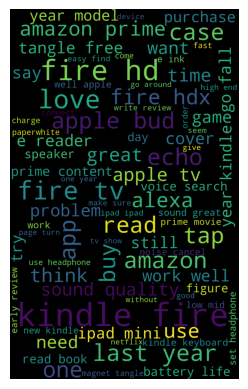

In [35]:
maskarray = np.array(Image.open("iron man.png"))
cloud = WordCloud(background_color = "black", max_words = 80, mask = maskarray, stopwords = set(STOPWORDS))
cloud

cloud.generate(reviews)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

#### b) positive words wordcloud

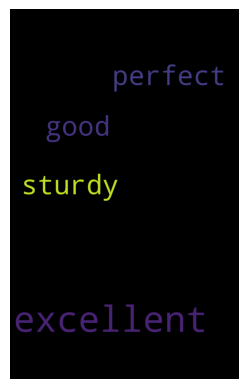

In [36]:
#separating positive words

with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")
    
#positive words wordcloud
pos_words = " ".join([w for w in data_list if w in poswords])

maskarray = np.array(Image.open("iron man.png"))
cloud = WordCloud(background_color = "black", max_words = 300, mask = maskarray, stopwords = set(STOPWORDS))
cloud

cloud.generate(pos_words)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [37]:
pos_words

' good sturdy perfect excellent excellent'

#### c) negative words wordcloud

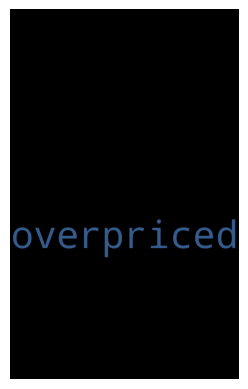

In [41]:
with open("negative-words.txt","r") as pos:
    negwords = pos.read().split("\n")
    
#negative word cloud
neg_words = " ".join([w for w in data_list if w in negwords])

maskarray = np.array(Image.open("iron man.png"))
cloud = WordCloud(background_color = "black", max_words = 200, mask = maskarray, stopwords = set(STOPWORDS))
cloud

cloud.generate(neg_words)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [42]:
a=len(pos_words)
b=len(neg_words)
c=len(reviews)
print(a)
print(b)
print(c)

40
11
859861


In [43]:
neg_words

'overpriced '

In [ ]:
#conclusion
#out 1597 reviews approx 965 reviews have 3, 4 and 5 star ratings
#from positive wordcloud we get to know that this amazon devices is good sturdy perfect excellent excellent.

In [ ]:
#so people are very satisfied.

3    350 Ratings
1    341
4    327
2    291
5    288